# Web Analytics Project
on Twitter,Yelp by
-Himanshu Nagdev

In [ ]:
Steps Used:
    1. Logging into Twitter API
    2. Scraping Data using Regex and API
    3. Cleaning of data
    4. Loading Data
    5. Transformation
    6. Classification
    7. Prediction
    8. Visualization

# Project Highlights
Scrape twitter tweets and yelp reviews and ratings
Train the model using the scraped data
Use the model to classify new information
    Twitter:
    Fetched the tweets for Barack Obama, Narendra Modi and Kim kardashian using twitter API.
    API allows only 200 tweets per ID per API call
    As API allows a max of latest 3200 tweets per ID, so we made 16 calls for each ID.
    After API calls, we had a total of 9,600 tweets
    We then trained our models to classify between the three IDs using the training set
    Yelp:
    Scraped around a total of 2000 Shake-Shake reviews from yelp.com
    Used regex to find reviews and ratings
    We then trained our models to classify between the five reivews
    
    In all the above classifiers, we used textblob classifier, SVM, SVR and MNB
    
    
    
    


In [ ]:
#To get the Tweet ID from twitter api using the screen name(user_name)
# Here we are using username: Narendra Modi, Barack Obama, Kim Kardashian.

In [ ]:
#Id generating

#Code for Narendra Modi

from twython import Twython # pip install twython
import time # standard lib

consumer_key="4dRziGRD3AsKwipyzP9lCcg8n"
consumer_secret="hdeEoacz1v9SLausfAHlhpnWEvsfeqdcAcguS5lTRBrAY9VWc7"

# After the step above, you will be redirected to your app's page.
# Create an access token under the the "Your access token" section
access_token="212456898-bJ9dTWM12uF3OUMas4DWEzqsu2NX8lW8fDUZIMVv"
access_token_secret="Ak2GT7jCj5VQgyYPSEtduLFWct0p5hN6OluRJD7K9ALkH"


twitter = Twython(consumer_key,consumer_secret,access_token,access_token_secret)
#lis = [615149853543260160] ## this is the latest starting tweet id

## tweet extract method with the last list item as the max_id
user_timeline = twitter.get_user_timeline(screen_name="narendramodi", count=1)
user_timeline.maxid()

Output
>>615149853543260160


twitter = Twython(consumer_key,consumer_secret,access_token,access_token_secret)
#lis = [615149853543260160] ## this is the latest starting tweet id

## tweet extract method with the last list item as the max_id
user_timeline = twitter.get_user_timeline(screen_name="BarackObama", count=1)
user_timeline.maxid()

Output
>>617373842839834624 



twitter = Twython(consumer_key,consumer_secret,access_token,access_token_secret)
#lis = [615149853543260160] ## this is the latest starting tweet id

## tweet extract method with the last list item as the max_id
user_timeline = twitter.get_user_timeline(screen_name="KimKardashian", count=1)
user_timeline.maxid()

Output
>>617149602467201024


In [ ]:
#Data Scraping

# Fetching text from Twitter for all the individuals using ID

# Code for Narendra Modi and it writes tweet in clean_narendra.txt

# Problem: Initally we were getting just 20 tweets, then 300 per loop(finally after using the code
#of max iD we were able to generate 200 tweets per loop)

In [ ]:
sep = '||||||||||'
from twython import Twython # pip install twython
import time # standard lib
consumer_key="4dRziGRD3AsKwipyzP9lCcg8n"
consumer_secret="hdeEoacz1v9SLausfAHlhpnWEvsfeqdcAcguS5lTRBrAY9VWc7"
# After the step above, you will be redirected to your app's page.
# Create an access token under the the "Your access token" section
access_token="212456898-bJ9dTWM12uF3OUMas4DWEzqsu2NX8lW8fDUZIMVv"
access_token_secret="Ak2GT7jCj5VQgyYPSEtduLFWct0p5hN6OluRJD7K9ALkH"
filewrite = open('clean_narendra.txt','w')
a=[]
twitter = Twython(consumer_key,consumer_secret,access_token,access_token_secret)
lis = [615149853543260160] ## this is the latest starting tweet id
for i in range(0, 16): ## iterate through all tweets
    print("Printing group :",i)
## tweet extract method with the last list item as the max_id
    user_timeline = twitter.get_user_timeline(screen_name="narendramodi",
    count=200, include_retweets=False, max_id=lis[-1])
    #time.sleep(300) ## 5 minute rest between api calls

    for tweet in user_timeline:
        filewrite.write(tweet['text'].encode('utf-8'))
        filewrite.write(sep)
        #print tweet['text'] ## print the tweet
        a.append(tweet['text'])
        lis.append(tweet['id']) ## append tweet id'
        
filewrite.close()


#Code for Barack Obama and it writes tweet in clean_barackobama.txt

from twython import Twython # pip install twython
import time # standard lib
consumer_key="4dRziGRD3AsKwipyzP9lCcg8n"
consumer_secret="hdeEoacz1v9SLausfAHlhpnWEvsfeqdcAcguS5lTRBrAY9VWc7"
# After the step above, you will be redirected to your app's page.
# Create an access token under the the "Your access token" section
access_token="212456898-bJ9dTWM12uF3OUMas4DWEzqsu2NX8lW8fDUZIMVv"
access_token_secret="Ak2GT7jCj5VQgyYPSEtduLFWct0p5hN6OluRJD7K9ALkH"
filewrite = open('clean_barackobama.txt','w')
a=[]
twitter = Twython(consumer_key,consumer_secret,access_token,access_token_secret)
lis = [617373842839834624] ## this is the latest starting tweet id
for i in range(0, 16): ## iterate through all tweets
    print("Printing group :",i)
## tweet extract method with the last list item as the max_id
    user_timeline = twitter.get_user_timeline(screen_name="BarackObama",
    count=200, include_retweets=False, max_id=lis[-1])
    #time.sleep(300) ## 5 minute rest between api calls

    for tweet in user_timeline:
        filewrite.write(tweet['text'].encode('utf-8'))
        filewrite.write(sep)
        #print tweet['text'] ## print the tweet
        a.append(tweet['text'])
        lis.append(tweet['id']) ## append tweet id'
        
filewrite.close()

#Code for Kim and it writes tweets in clean_Kim.txt

from twython import Twython # pip install twython
import time # standard lib
consumer_key="4dRziGRD3AsKwipyzP9lCcg8n"
consumer_secret="hdeEoacz1v9SLausfAHlhpnWEvsfeqdcAcguS5lTRBrAY9VWc7"
# After the step above, you will be redirected to your app's page.
# Create an access token under the the "Your access token" section
access_token="212456898-bJ9dTWM12uF3OUMas4DWEzqsu2NX8lW8fDUZIMVv"
access_token_secret="Ak2GT7jCj5VQgyYPSEtduLFWct0p5hN6OluRJD7K9ALkH"
filewrite = open('clean_Kim.txt','w')
a=[]
twitter = Twython(consumer_key,consumer_secret,access_token,access_token_secret)
lis = [617149602467201024] ## this is the latest starting tweet id
for i in range(0, 16): ## iterate through all tweets
    print("Printing group :",i)
## tweet extract method with the last list item as the max_id
    user_timeline = twitter.get_user_timeline(screen_name="KimKardashian",
    count=200, include_retweets=False, max_id=lis[-1])
    #time.sleep(300) ## 5 minute rest between api calls

    for tweet in user_timeline:
        filewrite.write(tweet['text'].encode('utf-8'))
        filewrite.write(sep)
        #print tweet['text'] ## print the tweet
        a.append(tweet['text'])
        lis.append(tweet['id']) ## append tweet id'
        
filewrite.close()


In [ ]:
#Cleaned the data using code which removes all the RT(retweets)


In [ ]:

import numpy
f = open('clean_narendra.txt').read()
new_f=open('clean_narendra.txt','w')

x=[]
y=[]
raw = f.strip().split(sep)
count=0
dataset=[]
for sentence in raw:
    #print(sentence)
    sentencelist = sentence.strip().split()
    if sentencelist and sentencelist[0]!="RT":
        count+=1
        dataset.append(sentence)
        new_f.write(sentence)
        new_f.write('\n')
        new_f.write(sep)
        new_f.write('\n')

#print(count)
#numpy.corrcoef(x,y)
#print(y)


    #type(sentence)
    #print len(sentence.split())
#ptint()
print(count)


import numpy
f = open('clean_barack.txt').read()
new_f=open('clean_barack.txt','w')

x=[]
y=[]
raw = f.strip().split(sep)
count=0
dataset=[]
for sentence in raw:
    #print(sentence)
    sentencelist = sentence.strip().split()
    if sentencelist and sentencelist[0]!="RT":
        count+=1
        dataset.append(sentence)
        new_f.write(sentence)
        new_f.write('\n')
        new_f.write(sep)
        new_f.write('\n')

#print(count)
#numpy.corrcoef(x,y)
#print(y)


    #type(sentence)
    #print len(sentence.split())
#ptint()
print(count)


import numpy
f = open('clean_Kim.txt').read()
new_f=open('clean_Kim.txt','w')

x=[]
y=[]
raw = f.strip().split(sep)
count=0
dataset=[]
for sentence in raw:
    #print(sentence)
    sentencelist = sentence.strip().split()
    if sentencelist and sentencelist[0]!="RT":
        count+=1
        dataset.append(sentence)
        new_f.write(sentence)
        new_f.write('\n')
        new_f.write(sep)
        new_f.write('\n')

#print(count)
#numpy.corrcoef(x,y)
#print(y)


    #type(sentence)
    #print len(sentence.split())
#ptint()
print(count)

In [ ]:
Analysis of common words on the text file of Narendra Modi, Barack Obama, Kim
by removing stop words

In [ ]:
# Kim text file and its most common words
import collections
from nltk.corpus import stopwords
freq_counter = collections.Counter()
line = open('clean_kim.txt').read().split(sep)
freq_counter = collections.Counter()
split1 = [sentence.split() for sentence in line]

sw = set(stopwords.words(english))

for sublists in split1:
    for words in sublists:
        if words.lower() not in sw:
            freq_counter[words]+=1
del freq_counter['&amp;']
freq_counter

In [ ]:
import collections

freq_counter = collections.Counter()
line = open('clean_barack.txt').read().split(sep)
freq_counter = collections.Counter()
split1 = [sentence.split() for sentence in line]

for sublists in split1:
    for words in sublists:
        if words.lower() not in sw:
            freq_counter[words]+=1
del freq_counter['&amp;']
freq_counter

In [ ]:
import collections

freq_counter = collections.Counter()
line = open('clean_narendra.txt').read().split(sep)
split1 = [sentence.split() for sentence in line]
for sublists in split1:
    for words in sublists:
        if words.lower() not in sw:
            freq_counter[words]+=1
del freq_counter['&amp;']
freq_counter

In [ ]:
#Sentiment Analysis for all the three personalities

NarendraModi
Total Output:1739

Kim
Total Output:858

Barack Obama
Total Output:806


In [ ]:
import numpy
f = open('clean_kim.txt').read()
neg = open('negative-words.txt').read()
neglist = neg.strip().split()
pos = open('positive-words.txt').read()
poslist = pos.strip().split()
global_sentiment=0
x=[]
y=[]
raw = f.strip().split(sep)
for sentence in raw:
    sentencelist = sentence.strip().split()
    xp = 0
    xn = 0
    for word in sentencelist:
        if word in poslist:
            xp+=1
        if word in neglist:
            xn+=1
        sentiment = xp-xn
    y.append(sentiment)
    
    x.append(len(sentencelist))
    print (sentence, (sentiment))
    global_sentiment+=sentiment

#numpy.corrcoef(x,y)
#print(y)

print(global_sentiment)
    #type(sentence)
    #print len(sentence.split())
#print()

In [ ]:
import numpy
f = open('clean_narendra.txt').read()
neg = open('negative-words.txt').read()
neglist = neg.strip().split()
pos = open('positive-words.txt').read()
poslist = pos.strip().split()
global_sentiment=0
x=[]
y=[]
raw = f.strip().split(sep)
for sentence in raw:
    sentencelist = sentence.strip().split()
    xp = 0
    xn = 0
    for word in sentencelist:
        if word in poslist:
            xp+=1
        if word in neglist:
            xn+=1
        sentiment = xp-xn
    y.append(sentiment)
    
    x.append(len(sentencelist))
    print (sentence, (sentiment))
    global_sentiment+=sentiment

#numpy.corrcoef(x,y)
#print(y)

print(global_sentiment)
    #type(sentence)
    #print len(sentence.split())
#print()

In [ ]:
import numpy
f = open('clean_barack.txt').read()
neg = open('negative-words.txt').read()
neglist = neg.strip().split()
pos = open('positive-words.txt').read()
poslist = pos.strip().split()
global_sentiment=0
x=[]
y=[]
raw = f.strip().split(sep)
for sentence in raw:
    sentencelist = sentence.strip().split()
    xp = 0
    xn = 0
    for word in sentencelist:
        if word in poslist:
            xp+=1
        if word in neglist:
            xn+=1
        sentiment = xp-xn
    y.append(sentiment)
    
    x.append(len(sentencelist))
    print (sentence, (sentiment))
    global_sentiment+=sentiment

#numpy.corrcoef(x,y)
#print(y)

print(global_sentiment)
    #type(sentence)
    #print len(sentence.split())
#print()

In [ ]:
Correlation between Length of Sentiment and Tweet of an individual

In [20]:
import numpy
f = open('clean_narendra.txt').read()
neg = open('negative-words.txt').read()
neglist = neg.strip().split()
pos = open('positive-words.txt').read()
poslist = pos.strip().split()
x=[]
y=[]
raw = f.strip().split(sep)
for sentence in raw:
    sentencelist = sentence.strip().split()
    xp = 0
    xn = 0
    for word in sentencelist:
        if word in poslist:
            xp+=1
        if word in neglist:
            xn+=1
        sentiment = xp-xn
    y.append(sentiment)
    
    x.append(len(sentencelist)<5)
    #print (len(sentencelist) , (sentiment))

numpy.corrcoef(x,y)
#print(y)


    #type(sentence)
    #print len(sentence.split())
#ptint()

array([[ 1.        , -0.09835134],
       [-0.09835134,  1.        ]])

In [24]:
import numpy
f = open('clean_narendra.txt').read()
neg = open('negative-words.txt').read()
neglist = neg.strip().split()
pos = open('positive-words.txt').read()
poslist = pos.strip().split()
x=[]
y=[]
raw = f.strip().split(sep)
for sentence in raw:
    sentencelist = sentence.strip().split()
    xp = 0
    xn = 0
    for word in sentencelist:
        if word in poslist:
            xp+=1
        if word in neglist:
            xn+=1
        sentiment = xp-xn
    y.append(sentiment)
    
    x.append(5<len(sentencelist)<10)
    #print (len(sentencelist) , (sentiment))

numpy.corrcoef(x,y)
#print(y)


    #type(sentence)
    #print len(sentence.split())
#ptint()

array([[ 1.      , -0.100381],
       [-0.100381,  1.      ]])

In [21]:
import numpy
f = open('clean_Kim.txt').read()
neg = open('negative-words.txt').read()
neglist = neg.strip().split()
pos = open('positive-words.txt').read()
poslist = pos.strip().split()
x=[]
y=[]
raw = f.strip().split(sep)
for sentence in raw:
    sentencelist = sentence.strip().split()
    xp = 0
    xn = 0
    for word in sentencelist:
        if word in poslist:
            xp+=1
        if word in neglist:
            xn+=1
        sentiment = xp-xn
    y.append(sentiment)
    
    x.append(len(sentencelist))
    #print (len(sentencelist) , (sentiment))

numpy.corrcoef(x,y)
#print(y)


    #type(sentence)
    #print len(sentence.split())
#ptint()

array([[ 1.        ,  0.26968115],
       [ 0.26968115,  1.        ]])

In [17]:
import numpy
f = open('clean_barack.txt').read()
neg = open('negative-words.txt').read()
neglist = neg.strip().split()
pos = open('positive-words.txt').read()
poslist = pos.strip().split()
x=[]
y=[]
raw = f.strip().split(sep)
for sentence in raw:
    sentencelist = sentence.strip().split()
    xp = 0
    xn = 0
    for word in sentencelist:
        if word in poslist:
            xp+=1
        if word in neglist:
            xn+=1
        sentiment = xp-xn
    y.append(sentiment)
    
    x.append(len(sentencelist))
    #print (len(sentencelist) , (sentiment))

numpy.corrcoef(x,y)
#print(y)


    #type(sentence)
    #print len(sentence.split())
#ptint()

array([[ 1.        ,  0.12865671],
       [ 0.12865671,  1.        ]])

In [ ]:
Twitter Classification using Textblob

In [3]:

''' This will make a tuple combination for the tweets and the ID'''
f_modi = open('clean_narendra.txt').read().strip().split(sep)
f_barack = open('clean_barack.txt').read().strip().split(sep)
f_kim = open('clean_kim.txt').read().strip().split(sep)

train = []

for sentence in f_modi:
      train.append(tuple([unicode(sentence.strip(),errors='replace'),'modi']))
''' We are using unicode function to avoid asci errors while processing the text through NaiveBayesClassifier '''
        
for sentence in f_kim:
      train.append(tuple([unicode(sentence.strip(),errors='replace'),'kim']))
        
for sentence in f_barack:
      train.append(tuple([unicode(sentence.strip(),errors='replace'),'barack']))

        
temp = train
import random
random.shuffle(temp)

In [21]:
from textblob.classifiers import NaiveBayesClassifier
import time
t0= time.time()

tt=temp[0:1000]
cl = NaiveBayesClassifier(tt)

t1 = time.time()
print("Time Taken:",t1-t0)




('Time Taken:', 547.7571029663086)


In [26]:
print delit.prob('kim')
print delit.prob('barack')
print delit.prob('modi')

0.982836188926
0.016035550971
0.00112826010304


In [28]:
try_tweet='''not this year. I'm pregnant so can't. i loved it though so maybe in a year or two. it was so hard on my hair though. '''
print cl.classify(try_tweet)
delit = cl.prob_classify(try_tweet)
print delit.prob('kim')
print delit.prob('barack')
print delit.prob('modi')

kim
0.999901065102
9.88214942063e-05
1.13403755996e-07


In [31]:
try_text='''Read how the Obama administration plans to help renters and low-income homeowners gain easier access to solar energy:'''
print cl.classify(try_text)
delit = cl.prob_classify(try_text)

print delit.prob('kim')
print delit.prob('barack')
print delit.prob('modi')

barack
1.67761437813e-08
0.999999969336
1.38874217382e-08


In [33]:
try_text = '''So excited one of my favorite make up brands @CTilburyMakeup is sponsoring my master make up class with'''
print cl.classify(try_text)
delit = cl.prob_classify(try_text)

print delit.prob('kim')
print delit.prob('barack')
print delit.prob('modi')

kim
0.999970859469
2.05406245555e-05
8.59990646703e-06


In [34]:
try_text = '''A new rail network is being created in addition to enhancing the existing network at a cost of Rs. 57000 Crore.'''
print cl.classify(try_text)
delit = cl.prob_classify(try_text)

print delit.prob('kim')
print delit.prob('barack')
print delit.prob('modi')

barack
0.0275963172888
0.568873969273
0.403529713439


In [36]:
try_text='''National Skill Development Mission, Pradhan Mantri Kaushal Vikas Yojana & Skill Loan Scheme are determined efforts to create a Skilled India'''

print cl.classify(try_text)
delit = cl.prob_classify(try_text)

print delit.prob('kim')
print delit.prob('barack')
print delit.prob('modi')

modi
2.36349224036e-08
1.87254369546e-08
0.99999995764


# Twitter Classification using Scikit-Learn 

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVR
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import sent_tokenize, word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.cross_validation import train_test_split


def pre_process(text):
    """
    Function used to process the given text
    1. Replace ,.'" with ''
    2. Tokenzie the text using NLTK word tokenizer
    3. Remove stop words from the token.
    4. Convert the tokens to lower case
    5. Lemmatize the tokens using WordNet Lemmatizer
    :param text: raw review text
    :return: processed tokens
    """
    #print("Hello********************************************************************************************")
    # replace (,.'") with ''
    text = text.replace('||||', '')
    text = text.replace(',', '')
    text = text.replace('@', '')
    text = text.replace('.', '')
    text = text.replace("'", '')
    text = text.replace("\"", '')

     # tokenize into words
    tokens = [word for sent in sent_tokenize(text) for word in word_tokenize(sent)]
#
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
#
    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]

    # lower capitalization
    tokens = [word.lower() for word in tokens]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]

    return tokens


In [39]:
''' This will make a tuple combination for the tweets and the ID'''
f_modi = open('clean_narendra.txt').read().strip().split(sep)
f_barack = open('clean_barack.txt').read().strip().split(sep)
f_kim = open('clean_kim.txt').read().strip().split(sep)

train = []

for sentence in f_modi:
      train.append(tuple([unicode(sentence.strip(),errors='replace'),'modi']))
''' We are using unicode function to avoid asci errors while processing the text through NaiveBayesClassifier '''
        
for sentence in f_kim:
      train.append(tuple([unicode(sentence.strip(),errors='replace'),'kim']))
        
for sentence in f_barack:
      train.append(tuple([unicode(sentence.strip(),errors='replace'),'barack']))


In [45]:
def CalculateSVM(data=None):
    """
    Function is used to classify review text based on Support Vector Machine Classifier
    :param data: Review text with the rating from the data set
    :return: print the accuracy Score
    """
    classifier = LinearSVC()
    vectorizer = TfidfVectorizer(tokenizer=pre_process)
    
    train, test = train_test_split([(t[0],t[1]) for t in data],
                                   test_size=.2,
                                   random_state=10)
    x_train = vectorizer.fit_transform(i[0] for i in train)
    x_test = vectorizer.transform(i[0] for i in test)
    classifier.fit(x_train, [i[1] for i in train])
    score = classifier.score(x_test, [i[1] for i in test])
    #print(classifier.predict(x_train[6]))
    print (score)

    
def CalculateMNB(data=None):
    """
    Function is used to classify review text based on Multinomial Bayes Classifier
    :param data: Review text with the rating from the data set
    :return: print the accuracy Score
    """
    vectorizer = TfidfVectorizer(tokenizer=pre_process)
    classifier = MultinomialNB()
    train, test = train_test_split([(t[0],t[1]) for t in data],
                                   test_size=.2,
                                   random_state=10)
    x_train = vectorizer.fit_transform(i[0] for i in train)
    x_test = vectorizer.transform(i[0] for i in test)
    classifier.fit(x_train, [i[1] for i in train])
    score = classifier.score(x_test, [i[1] for i in test])
    print (score)
    
def CalculateSVR(data=None):
    """
    Function is used to classify review text based on Support Vector Regression Classifier
    :param data: Review text with the rating from the data set
    :return: print the accuracy Score
    """
    vectorizer = TfidfVectorizer(tokenizer=pre_process)
    classifier = SVR(kernel='linear')
    train, test = train_test_split([(t[0],t[1]) for t in data],
                                   test_size=.2,
                                   random_state=10)
    x_train = vectorizer.fit_transform(i[0] for i in train)
    x_test = vectorizer.transform(i[0] for i in test)
    classifier.fit(x_train, [i[1] for i in train])
    score = classifier.score(x_test, [i[1] for i in test])
    print (score)


In [47]:
import random
temp=train
random.shuffle(temp)
data=temp[:200]
CalculateSVM(data)
CalculateMNB(data)
CalculateSVR(data)

0.825
0.725
0.65


# Code for scraping the Yelp reviews data for Shake Shack


In [ ]:
import requests
import re
''' 
We will be using only regex to find ratings and reviews from the source pages for Yelp!#
Pages URL follows a particular pattern. for example:
Page 1 URL is : http://www.yelp.com/biz/shake-shack-new-york-9
Page 2 URL is : http://www.yelp.com/biz/shake-shack-new-york-9?start=40
Page 3 URL is : http://www.yelp.com/biz/shake-shack-new-york-9?start=80
We can not guess that url for page n ends with (n-1)*40
i.e url for page 5 should then end with (5-1)*40 => 160.
which is correct: Here's the link to actual url for page 5:-
http://www.yelp.com/biz/shake-shack-new-york-9?start=160
'''
ratings=[] # Creating empty ratings list
reviews=[] # Creating empty reviews list
num_pages = 53
for i in range(1,num_pages): # This for Loops will navigate us to each page starting from page 1 and ending at page 52
    if i==1:
        url = 'http://www.yelp.com/biz/shake-shack-new-york-9'   
    else:
        url = "http://www.yelp.com/biz/shake-shack-new-york-9?start="+str((i-1)*40)
    # In the above If statement, for first page, url is default url for first page. Else we use our formula to 
    # derive the URL
    
    # Now we make a request to get the contents of the url
    html = requests.get(url)
    html
    # We now have the source code for the the url. We will now like to find all the reviews and ratings from this html code
    # To do that, we first try to find the html tags ralated to reviews and corresponding ratings
    # We will first focus on reviews
    # After using inspect element, we find that the tag for each reviews starts with 
    # <p itemprop="description" lang="en">       and ends with     </p>
    # Within these two texts lies the review description that we are looking for.
    # So we will use regex to extract that pattern.
    # All we want is to find pattern starting with '<p itemprop="description" lang="en"> and ending with '<\p>'
    # and fetch everything that is inside these two strings.
    # To do that we use (.+?) which basically means "fetch everything"
    regex_reviews_pattern = '<p itemprop="description" lang="en">(.+?)</p>'
    reg = re.compile(regex_reviews_pattern)  # Here we simply compile the pattern we are looking for
    match_reviews = re.findall(reg,html.text)
    for t in match_reviews: # We are using for loop for getting a flattened list
        reviews.append(t)
    # re.findall(*,*) returns a list of all the strings(reviews) that were inside the above two tags
    # So we now have the list of all the reviews in match_review.
    # We now will do similar stuff for ratings.
    # After inspecting, we find that rating starts with '<meta itemprop="ratingValue" content="4.0">
    reg_rating = '<meta itemprop="ratingValue" content=[\S]+'
    # here we are using [\S]+ in the end. This simply tells regex to find all strings which starts with
    # '<meta itemprop="ratingValue" content=' followed by anything but space. (\S) means anything but space
    regrating=re.compile(reg_rating)
    match_rating = re.findall(regrating,html.text)
    #match rating now have a list of ratings. We will though need to clean this a bit to get the numbers.
   
    for i in range(1,len(match_rating)):# We are removing the very first number ratings as that corresponds to the overall ratings 
        if match_rating[i]:
            t=re.findall(r'\d',match_rating[i])
            ratings.append(int(t[0]))
    

#result = zip(reviews,ratings)
print("Done")
x=zip(reviews,ratings)

In [ ]:
# Writing the data into a text file and dividing it using a splitter
f_open=open("yelpdata.txt",'w')
for pair in x:
    st = pair[0]+'||||'+str(pair[1])
    f_open.write(st.encode('utf-8'))
    f_open.write('\n')
    f_open.write("@@@@@@")
    f_open.write('\n')
    
    

# Yelp Classification using Textblob

In [38]:
f_yelp = open('yelpdata.txt').read().split('@@@@@@')
data=f_yelp[:1000]

train=[]
for sentence in data:
    temp=sentence.strip().split("||||")
    rev=temp[0]
    rate=int(temp[1])
    if rate<2:
        rate =0
    else:
        rate=1
    train.append(tuple((unicode(rev,errors='replace'),rate)))
    #train.append(tuple([unicode(sentence.strip(),errors='replace'),'modi']))

#train=[(t.strip().split("||||")[0],int(t.strip().split("||||")[1])) for t in data]

In [42]:
temp = train
import random
random.shuffle(temp)
from textblob.classifiers import NaiveBayesClassifier
tt=temp[0:1000]




In [43]:
import time
t0 = time.time()
cl = NaiveBayesClassifier(tt)
t1 = time.time()
print ("Time Taken:",t1-t0)

('Time Taken:', 2661.443375825882)


In [44]:
cl.classify("Burgers are a serious business in the Yelp community and - at least in our community- you will hear the question &#34;what is the best burger ever&#34; a lot. Once you get to talking, with other Yelpers, someone will start praising Shake Shack, guaranteed. So, naturally, when I first heard of it, I had high hopes. <br><br>My first impression was that the menu - like the restaurant - was very crowded and disorganized. The feel of the place is frantic and confused and it doesn&#39;t help the general confusion that they strangely rename common food items so that you have to order &#34;Flat-Top&#34; when you want a hotdog and why they insist on calling a normal cheeseburger a ShackBurger escapes me.")

1

In [49]:
print cl.classify("A great place.")
review_try = "A great place"
delit = cl.prob_classify(review_try)
print delit.prob(1)
print delit.prob(0)


1
1.0
1.60670128893e-73


# Yelp reviews classification using Scikit-Learn 

In [55]:
f_yelp = open('yelpdata.txt').read().split('@@@@@@')
data=f_yelp[:1000]


In [56]:
def CalculateSVM(data=None):
    """
    Function is used to classify review text based on Support Vector Machine Classifier
    :param data: Review text with the rating from the data set
    :return: print the accuracy Score
    """
    classifier = LinearSVC()
    vectorizer = TfidfVectorizer(tokenizer=pre_process)
    
    train, test = train_test_split([(t.strip().split("||||")[0],int(t.strip().split("||||")[1])) for t in data],
                                   test_size=.2,
                                   random_state=10)
    x_train = vectorizer.fit_transform(i[0] for i in train)
    x_test = vectorizer.transform(i[0] for i in test)
    classifier.fit(x_train, [i[1] for i in train])
    score = classifier.score(x_test, [i[1] for i in test])
    #sent='Had to try this place out since it&#39;s so hyped up. I never had it elsewhere so it was my first time and it as conveniently located down the block of our hotel. There was a long line, but it went by fast so I didn&#39;t have to wait as long as others always complain about. I had the SmokeShack, which was a Cheeseburger topped with all-natural applewood smoked bacon, chopped cherry pepper and ShackSauce. It turned out to be spicy, which was unexpected and also a bit soggy for something that just came fresh out. My boyfriend had the popular Shack Stack which is a Cheeseburger and a crispy mushroom topped with lettuce, tomato and ShackSauce. I gave it a try and did like the texture of the crispy mushroom paired with the burger, but if you&#39;ve been following me, I am not a fan of mushrooms so it was ok to me. The buns were way smaller than the patty, which got a bit messy too. What I did like best about this spot was their crinkled fries! The texture, temperature, and flavor was on point. I would just come back next time just to order the fries. I got the lemonade, which wasn&#39;t anything special, but I definitely want to try the custard milkshake next time I&#39;m back.'
    #i = len(sent.strip().split())
    #sn=sent.
    #print(classifier.predict(x_train[0]))
    print (score)




def CalculateMNB(data=None):
    """
    Function is used to classify review text based on Multinomial Bayes Classifier
    :param data: Review text with the rating from the data set
    :return: print the accuracy Score
    """
    vectorizer = TfidfVectorizer(tokenizer=pre_process)
    classifier = MultinomialNB()
    train, test = train_test_split([(t.strip().split("||||")[0],int(t.strip().split("||||")[1])) for t in data],
                                   test_size=.2,
                                   random_state=10)
    x_train = vectorizer.fit_transform(i[0] for i in train)
    x_test = vectorizer.transform(i[0] for i in test)
    classifier.fit(x_train, [i[1] for i in train])
    score = classifier.score(x_test, [i[1] for i in test])
    print (score)

def CalculateSVR(data=None):
    """
    Function is used to classify review text based on Support Vector Regression Classifier
    :param data: Review text with the rating from the data set
    :return: print the accuracy Score
    """
    vectorizer = TfidfVectorizer(tokenizer=pre_process)
    classifier = SVR(kernel='linear')
    train, test = train_test_split([(t.strip().split("||||")[0],int(t.strip().split("||||")[1])) for t in data],
                                   test_size=.2,
                                   random_state=10)
    x_train = vectorizer.fit_transform(i[0] for i in train)
    x_test = vectorizer.transform(i[0] for i in test)
    classifier.fit(x_train, [i[1] for i in train])
    score = classifier.score(x_test, [i[1] for i in test])
    print (score)


In [57]:
CalculateSVM(data)
CalculateSVR(data)
CalculateMNB(data)

0.555
0.25940368368
0.505


In [ ]:
Visualization on Twitter

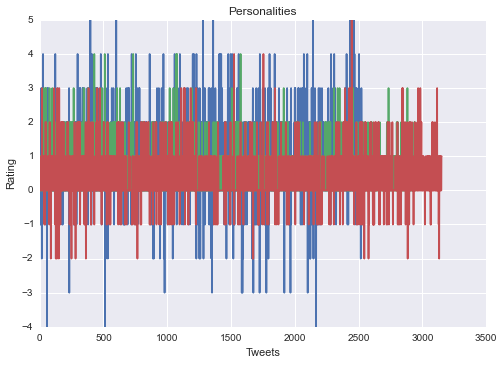

In [20]:
from IPython.display import Image
Image(filename='Tweet Analysis.png')


f = open('clean_narendra.txt',encoding='utf-8').read()
neg = open('negative-words.txt').read()
neglist = neg.strip().split()
pos = open('positive-words.txt').read()
poslist = pos.strip().split()
global_sentiment=0
x=[]
y=[]

raw = f.strip().split(sep)
for sentence in raw:
    #sentencelist1= sentence.encode('utf-8')
    st = str(sentence)
    sentencelist = st.strip().split()
    xp = 0
    xn = 0
    for word in sentencelist:
        if word in poslist:
            xp+=1
        if word in neglist:
            xn+=1
        sentiment = xp-xn
    y.append(sentiment)
    
    x.append(len(sentencelist))
    
    global_sentiment+=sentiment

plotting the tweets sentiment count vs the tweets for Narendra Modi
sns.set(style="darkgrid")
plt.title("Narendra Modi")
plt.xlabel('Tweets')
plt.ylabel('Rating')

g=range(0,len(y))
list(g)
g=list(g)
plt.plot(g,y)    #REMOVE THIS COMMENT FOR PLOTTING

#OBAMA
f1 = open('clean_barack.txt',encoding='utf-8').read()

global_sentiment1=0
x1=[]
y1=[]

raw1 = f1.strip().split(sep)
for sentence1 in raw1:
    #sentencelist1= sentence.encode('utf-8')
    st1 = str(sentence1)
    sentencelist1 = st1.strip().split()
    xp1 = 0
    xn1 = 0
    for word1 in sentencelist1:
        if word1 in poslist:
            xp1+=1
        if word in neglist:
            xn1+=1
        sentiment1 = xp1-xn1
    y1.append(sentiment1)
    
    x1.append(len(sentencelist1))
    #print (sentence, (sentiment))
    global_sentiment1+=sentiment1

sns.set(style="darkgrid")
plt.title("Obama")
plt.xlabel('Tweets')
plt.ylabel('Rating')

g1=range(0,len(y1))
list(g1)
g1=list(g1)
##plt.plot(g1,y1)#REMOVE THIS COMMENT FOR PLOTTING
#plotting the tweets sentiment count vs the tweets for Barack Obama
#KIM
f2 = open('clean_kim.txt',encoding='utf-8').read()

global_sentiment2=0
x2=[]
y2=[]

raw2 = f2.strip().split(sep)
for sentence2 in raw2:
    #sentencelist1= sentence.encode('utf-8')
    st2 = str(sentence2)
    sentencelist2 = st2.strip().split()
    xp2 = 0
    xn2 = 0
    for word2 in sentencelist2:
        if word2 in poslist:
            xp2+=1
        if word2 in neglist:
            xn2+=1
        sentiment2 = xp2-xn2
    y2.append(sentiment2)
    
    x2.append(len(sentencelist2))
    #print (sentence, (sentiment))
    global_sentiment2+=sentiment2
plotting the tweets sentiment count vs the tweets for Kim Kadashian
sns.set(style="darkgrid")
plt.title("Kim Kadashian")
plt.xlabel('Tweets')
plt.ylabel('Rating')

g2=range(0,len(y2))
list(g2)
g2=list(g2)
plt.plot(g2,y2)        
#plt.plot (global_sentiment)


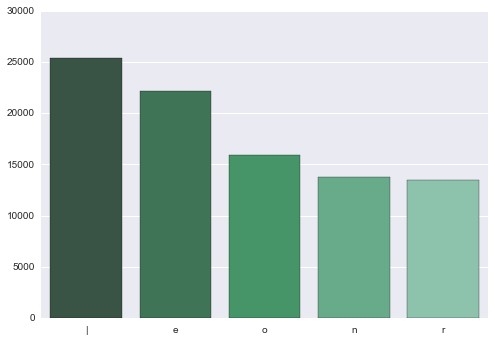

In [18]:
from IPython.display import Image
Image(filename='most used words.png')

# Most common Words plots
import collections
from nltk.corpus import stopwords
import seaborn as sns

sw = set(stopwords.words('english'))


line1 = open('clean_narendra.txt',encoding='utf-8').read()
line2 = open('clean_barack.txt',encoding='utf-8').read()
line3 = open('clean_kim.txt',encoding='utf-8').read()

freq_counter = collections.Counter()
freq_counter2 = collections.Counter()
freq_counter3 = collections.Counter()
split1 = [sentence.split() for sentence in line1]
split2 = [sentence.split() for sentence in line2]
split3 = [sentence.split() for sentence in line3]

for sublists in split1:
    for words in sublists:
        if words.lower() not in sw:
            freq_counter[words]+=1
for sublists in split2:
    for words in sublists:
        if words.lower() not in sw:
            freq_counter2[words]+=1
for sublists in split3:
    for words in sublists:
        if words.lower() not in sw:
            freq_counter3[words]+=1

del freq_counter['&amp;']
del freq_counter2['&amp;']
del freq_counter3['&amp;']
#freq_counter


t = freq_counter.most_common(10)
t2 = freq_counter2.most_common(10)
t3 = freq_counter3.most_common(10)
key=[]
value=[]
for pairs in t:
    key.append(pairs[0])
    value.append(pairs[1])


sns.barplot(key,value,palette="BuGn_d")

key2=[]
value2=[]
for pairs in t2:
    key2.append(pairs[0])
    value2.append(pairs[1])


sns.barplot(key2,value2,palette="BuGn_d")

key3=[]
value3=[]
for pairs in t3:
    key3.append(pairs[0])
    value3.append(pairs[1])


sns.barplot(key3,value3,palette="BuGn_d")


# Thank You